# Dune Sales Analysis

Dune, a renowned global retailer, offers a diverse array of products spanning accessories, clothing, and phones. With an expanding footprint across 14 countries and a dedicated team exceeding 70,000 employees, the company takes pride in delivering affordable choices for a diverse audience – from fashion-forward trendsetters to multi-generational families. Dune is committed to providing high-quality essentials and distinctive styles that cater to a broad spectrum of customers.

As the newly appointed Data Scientist, your initial responsibility is to analyze the company's sales data from the preceding year, presenting actionable insights and recommendations. This analysis aims to pinpoint areas of opportunity, guiding future business decisions focused on enhancing performance and maximizing profitability.

## Importing the Necessary Libraries

In [1]:
# Import Libraries
import pandas as pd # For Data Processing
import matplotlib.pyplot as plt #For Data Visualization
import seaborn as sns  # For Data Visualization
import missingno as msno # For Missing Data - Visualizatio
from collections import Counter # For Counting
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
# Loading the Dataset
df = pd.read_csv('/Users/mac/Desktop/Dune Sales Data.csv')
print('Dataset Imported Successfully')

Dataset Imported Successfully


In [3]:
# Printing the first rows of the dataset to understand its structure
df.head()  # By default, this will give you the first 5 rows

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [4]:
# Printing the bottom 5 rows of the dataset to check the end of the data
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dimensionality of the data - This is the number of rows and columns
df.shape

(34867, 12)

In [6]:
# Examine columns / features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [7]:
# Investigating the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [8]:
# Numerical Statistical Analysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [9]:
# Categorical Statistical Analysis
df.describe(include=["object", "bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


## Dealing with missing data

- MCAR (Missing completely at random): These are values that are randomly missing and do not depend on any other values
- MAR (Missing at random): These values are dependent on some additional features
- MNAR (Missing not at random): There is a reason behind these values are missing

Several techniques are available for handling missing data, including Measures of Central Tendency, regression imputation, and multiple imputation. Measures of Central Tendency involve substituting missing values with the Mean, Median, or Mode of the variable. In contrast, regression imputation utilizes other variables in the dataset to predict and replace missing values.

In [10]:
# First thing to do is to investigate the missing data
null_values = df.isnull().sum()
null_values

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

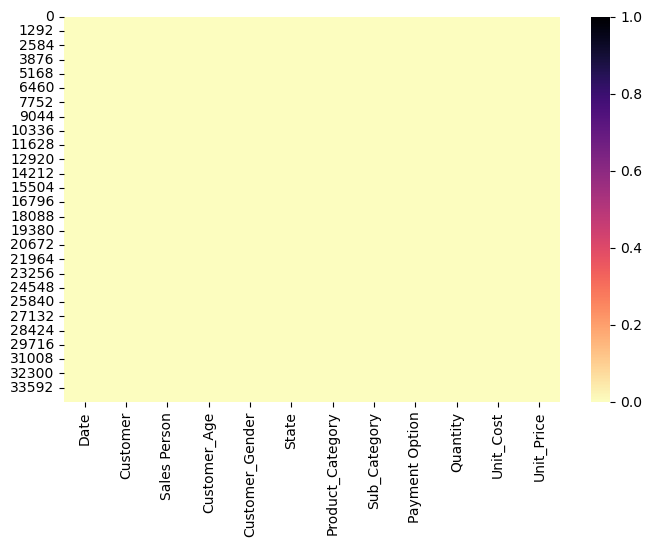

In [11]:
# Visualize the missing data
plt.figure(figsize = (8, 5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

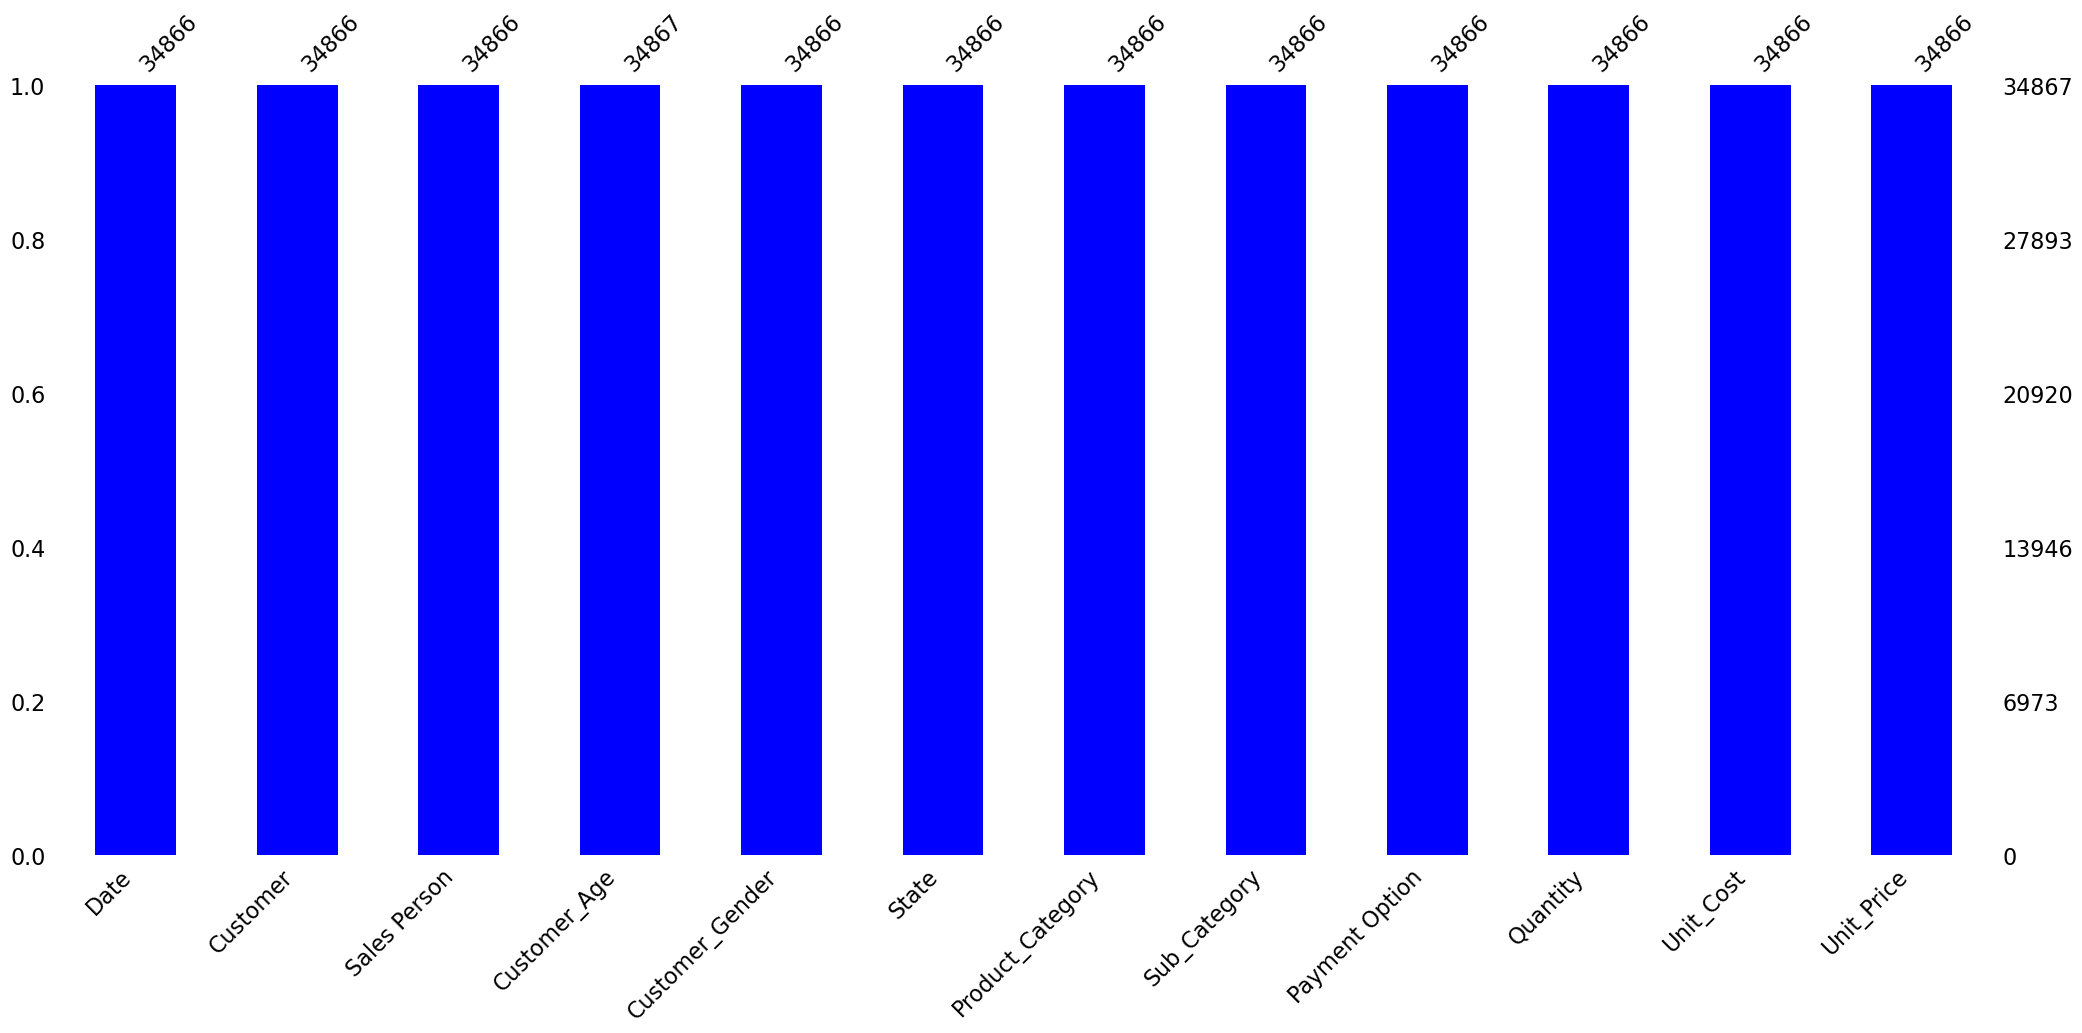

In [12]:
msno.bar(df, color="blue");

In [13]:
# Displaying where the missing data is in the data
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Dropping the missing data
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [16]:
# Datetime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [17]:
# Convert the data column into a pandas datetime object
df["Date"] = pd.to_datetime(df["Date"])

# Next thing is to extract the Year, Month, Quarter
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['month_name'] = df['Date'].dt.month_name()
df['quarter'] = df['Date'].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [18]:
# Group Customer Name
def age_group(x):
    if x <= 25:
        return "<= 25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return " 41-50 Old Adult"
    else:
        return ">= 51 Elders"

# Apply Function to the Group
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult


In [19]:
# Cost, Revenue, Profit Calculation
df["cost"] = df["Quantity"]*df["Unit_Cost"]
df["revenue"] = df["Quantity"]*df["Unit_Price"]
df["profit"] = df["revenue"] - df["cost"]

df.head(5)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,25-40 Adult,80.00,109.00,29.00
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,25-40 Adult,49.00,57.00,8.00
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,25-40 Adult,11.01,15.00,3.99
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,25-40 Adult,175.00,233.00,58.00
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,25-40 Adult,105.00,125.01,20.01


In [20]:
# Profit / Loss Grouping
def porl(x):
    if x >= 0:
        return "profit"
    else:
        return "loss"
    
df["profit_label"] = df['profit'].apply(porl)
df.head(5)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,25-40 Adult,80.00,109.00,29.00,profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,25-40 Adult,49.00,57.00,8.00,profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,25-40 Adult,11.01,15.00,3.99,profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,25-40 Adult,175.00,233.00,58.00,profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,25-40 Adult,105.00,125.01,20.01,profit


# Univariate Analysis

### Categorical Visualization

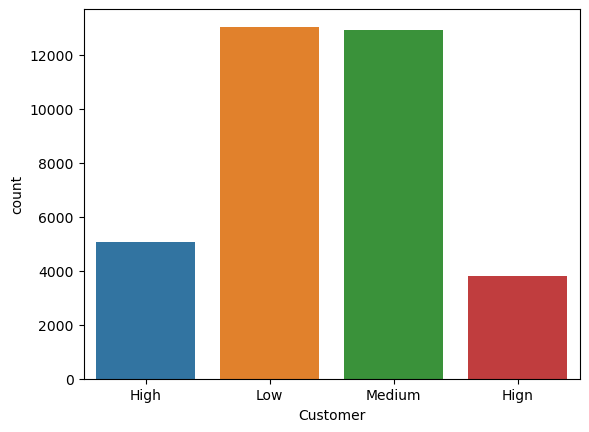

In [21]:
# How many customers belong to each customer spec
sns.countplot(x="Customer", data=df);

In [22]:
# Investigate the column affected
df[df["Customer"] == "Hign"].head(5)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.00,loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.00,profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.00,profit
29773,2015-08-10,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,1.0,...,69.00,2015,8,August,3,25-40 Adult,60.00,69.00,9.00,profit
29774,2015-08-25,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,47.00,2015,8,August,3,25-40 Adult,125.01,141.00,15.99,profit


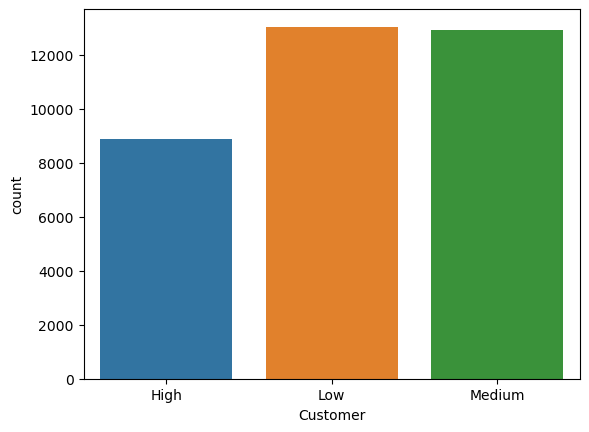

In [23]:
# Correct the spelling of HIGN
df.loc[df["Customer"] == "Hign", "Customer"] = "High"

sns.countplot(x="Customer", data=df);

In [24]:
df["Customer"].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

### Narration and Observation
The customer distribution across categories is relatively balanced, with 13,041 in the "Low," 12,926 in the "Medium," and 8,899 in the "High" category. The slightly higher count in the "Medium" category suggests a significant portion of the customer base falls into a middle ground, while the "Low" category indicates a substantial proportion may be price-sensitive. Overall, the distribution reflects a diverse customer base with varying preferences.

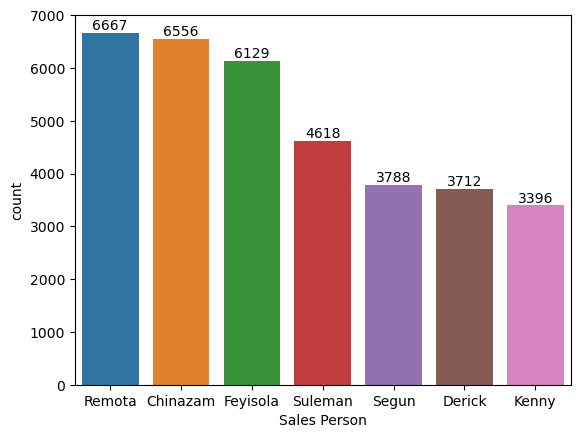

In [25]:
# Sales person - How many transactions by sales person
ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

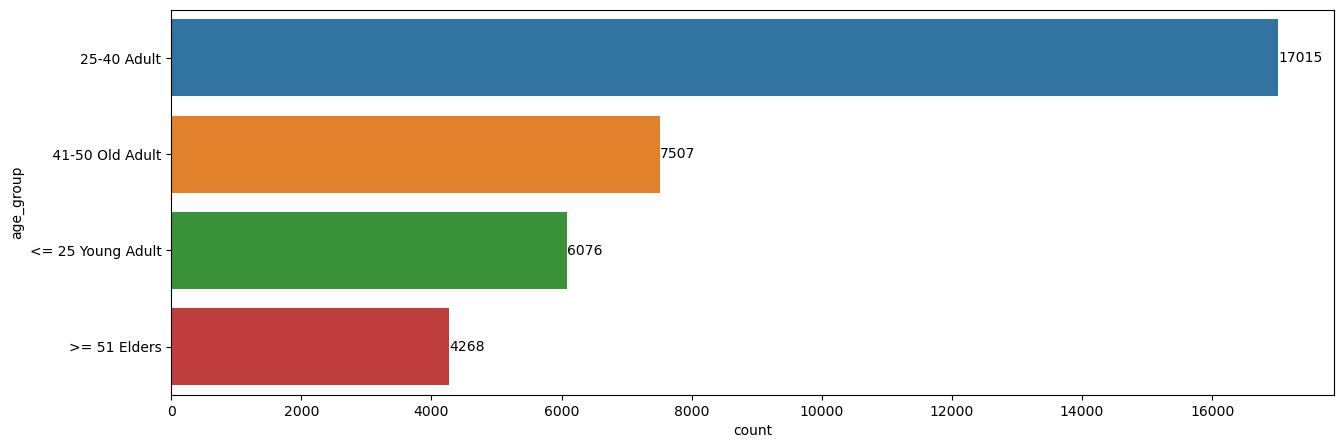

In [26]:
# Total Transactions By Customer Age
plt.figure(figsize = (15,5))

ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

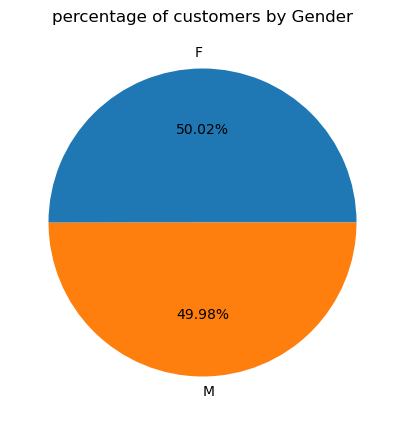

In [27]:
# Total Transaction by Customer Gender
fig, ax = plt.subplots(figsize = (5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p: f'{p:.2f}%')
ax.set_title("percentage of customers by Gender")
plt.show();

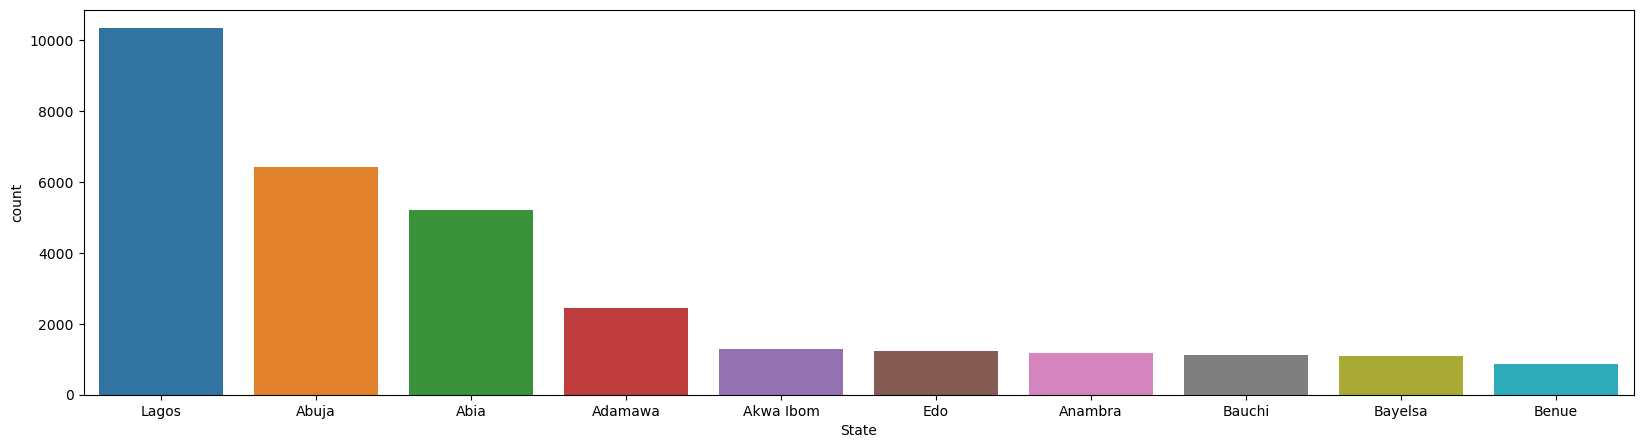

In [28]:
# Total 10 Transactions by State
plt.figure(figsize=(20,5))

topten = df["State"].value_counts().head(10)

sns.countplot(x="State",  data=df, order=topten.index);

In [29]:
df["State"].value_counts().head(10)

Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: State, dtype: int64

### The data indicates that Lagos leads in the number of transactions, followed by Abuja, Abia, Adamawa, and Akwa Ibom. These states collectively contribute significantly to the overall transactions, highlighting their significance as key markets for the business.

In [30]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

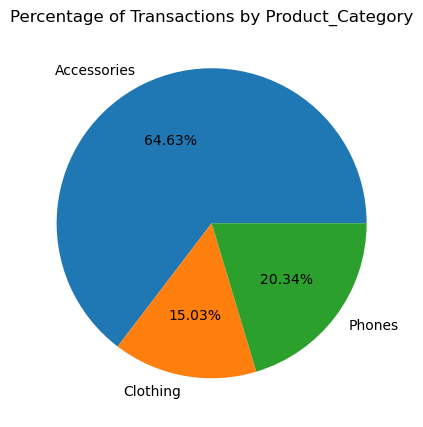

In [31]:
fig, ax = plt.subplots(figsize = (5,10))
count = Counter(df["Product_Category"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%' )
ax.set_title("Percentage of Transactions by Product_Category")
plt.show();

In [32]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

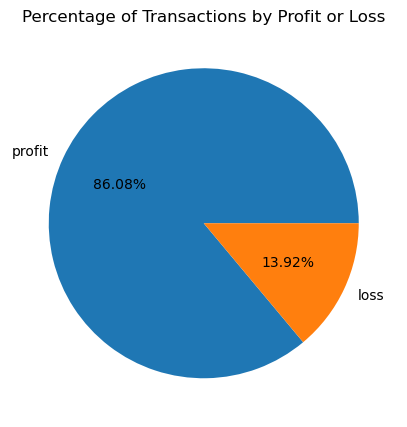

In [33]:
# Total Transaction by Profit or Loss

fig, ax = plt.subplots(figsize = (5,10))
count = Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%' )
ax.set_title("Percentage of Transactions by Profit or Loss")
plt.show();

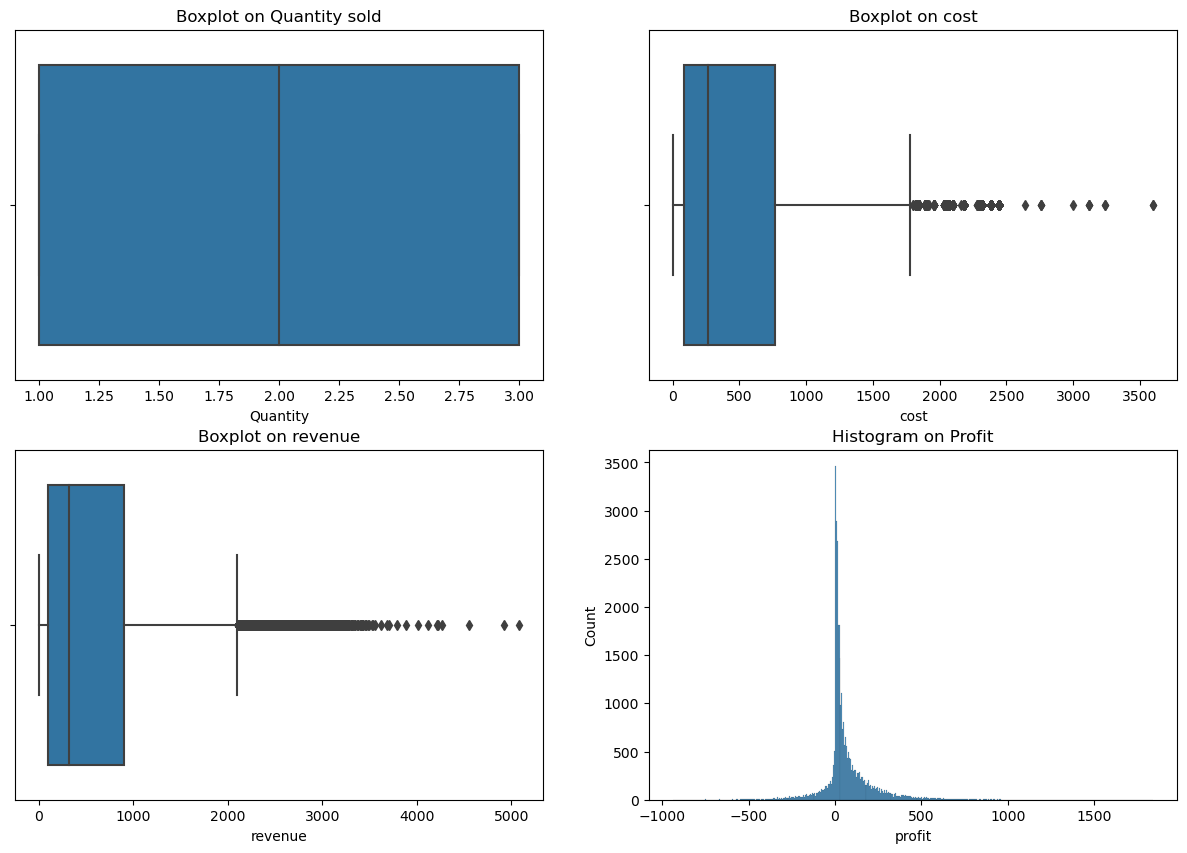

In [34]:
# Numerical Data Visualization
#Quantity, Cost, Revenue and Profit - Using Subplot

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,10))

sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on cost")

sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on revenue")

sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on Profit");

# Bivariate Analysis

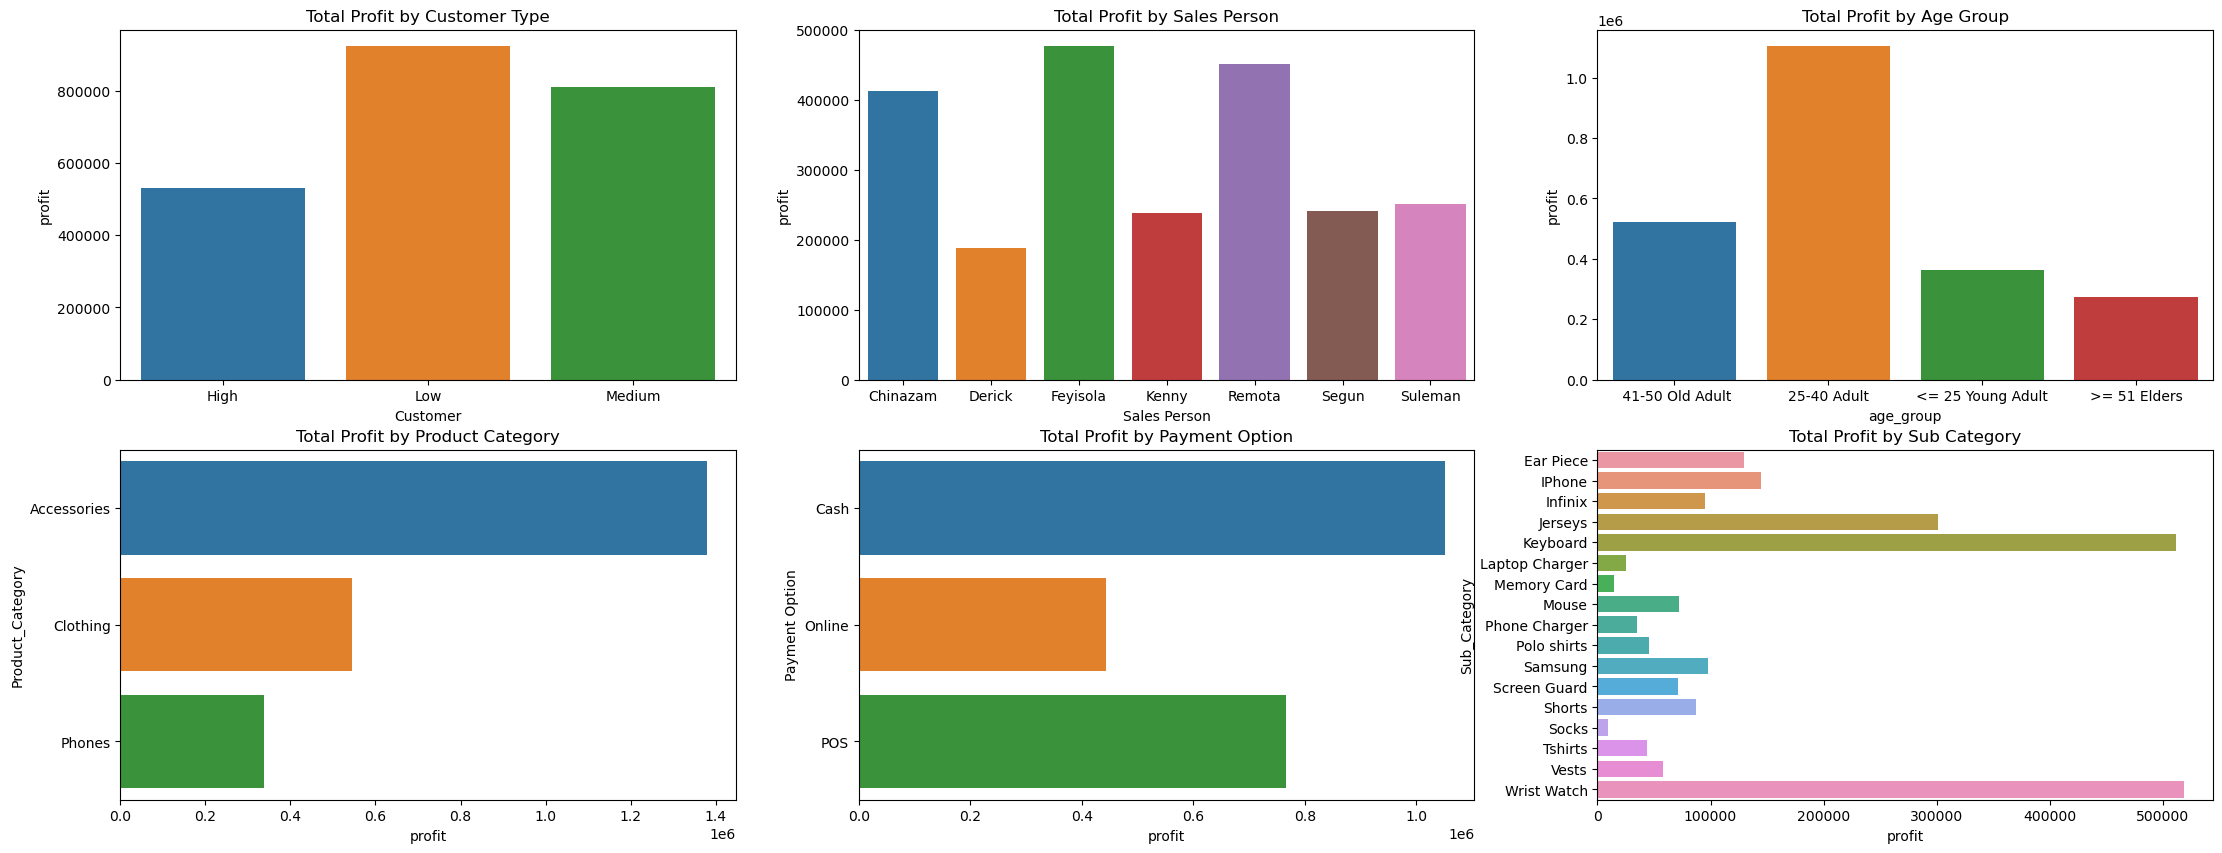

In [35]:
# Categorical Columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (27,10))

cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x='Customer', data=cust_prof, y='profit', ax=axs[0,0])
axs[0,0].set_title("Total Profit by Customer Type")

sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x='Sales Person', data=sp_prof, y='profit', ax=axs[0,1])
axs[0,1].set_title("Total Profit by Sales Person")

ag_prof = df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x='age_group', data=ag_prof, y='profit', ax=axs[0,2])
axs[0,2].set_title("Total Profit by Age Group")

pc_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(y='Product_Category', data=pc_prof, x='profit', ax=axs[1,0])
axs[1,0].set_title("Total Profit by Product Category")

po_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(y='Payment Option', data=po_prof, x='profit', ax=axs[1,1])
axs[1,1].set_title("Total Profit by Payment Option")

sc_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(y='Sub_Category', data=sc_prof, x='profit', ax=axs[1,2])
axs[1,2].set_title("Total Profit by Sub Category");

In [36]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

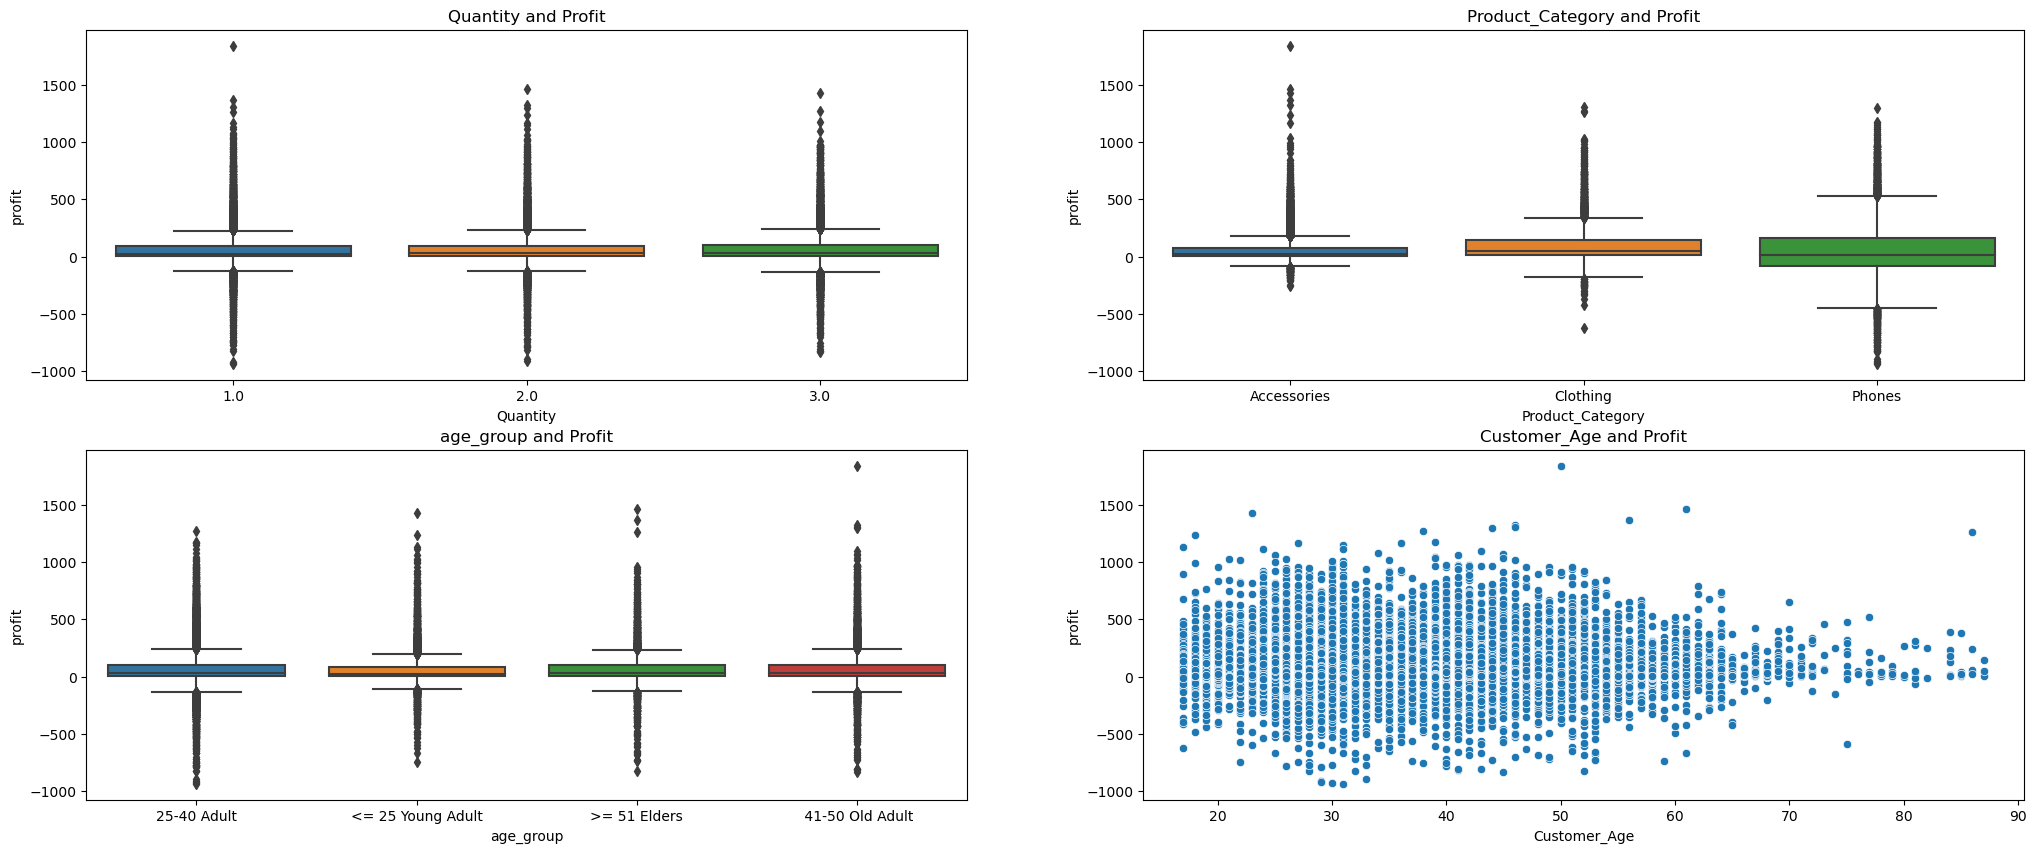

In [37]:
# Numerical Columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x='Quantity', y='profit', data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x='Product_Category', y='profit', data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit")

sns.boxplot(x='age_group', y='profit', data=df, ax=axs[1,0])
axs[1,0].set_title("age_group and Profit")

sns.scatterplot(x='Customer_Age', y='profit', data=df, ax=axs[1,1])
axs[1,1].set_title("Customer_Age and Profit");

# Multivariate Analysis

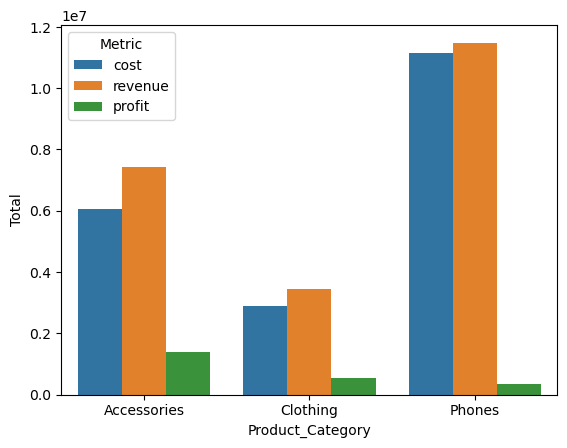

In [38]:
# Peoduct Category, Cost, Revenue and Profit

productcat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
productcat = pd.melt(productcat, id_vars="Product_Category", var_name="Metric", value_name="Total")
sns.barplot(data=productcat, x='Product_Category', y="Total", hue="Metric");

In [39]:
productcat

,Product_Category,Metric,Total
0,Accessories,cost,6041896.06
1,Clothing,cost,2892324.94
2,Phones,cost,11148745.02
3,Accessories,revenue,7420663.12
4,Clothing,revenue,3437556.95
5,Phones,revenue,11486354.63
6,Accessories,profit,1378767.06
7,Clothing,profit,545232.01
8,Phones,profit,337609.61


### The data indicates that Accessories emerges as the most lucrative product category, boasting a robust profit margin of 22.80%. Phones follow closely with a slightly lower profit margin of 3.03%, while Clothing exhibits the lowest profit margin at 18.82%.

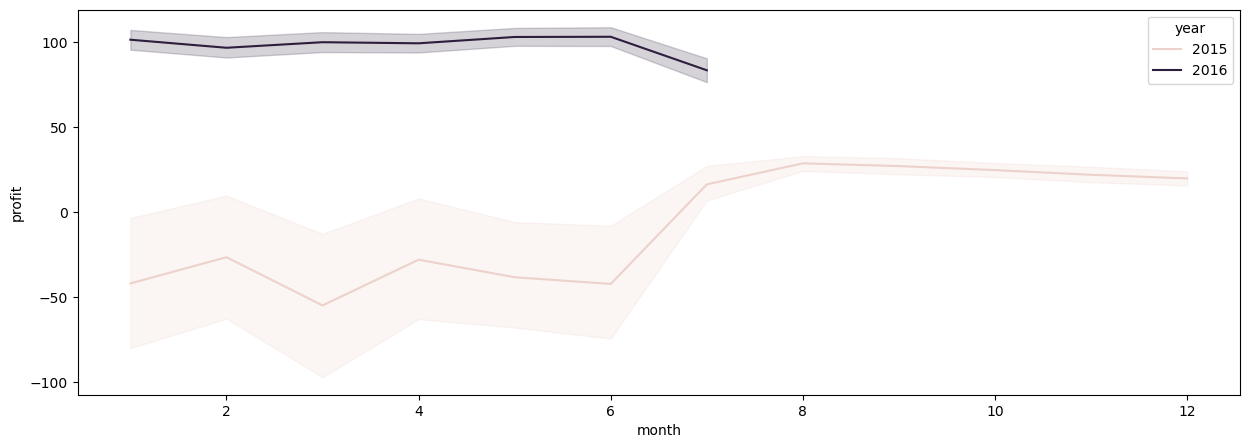

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y="profit", data=df, hue='year');

In [41]:
# Using Pivot Table in Python
df.pivot_table(values='profit', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


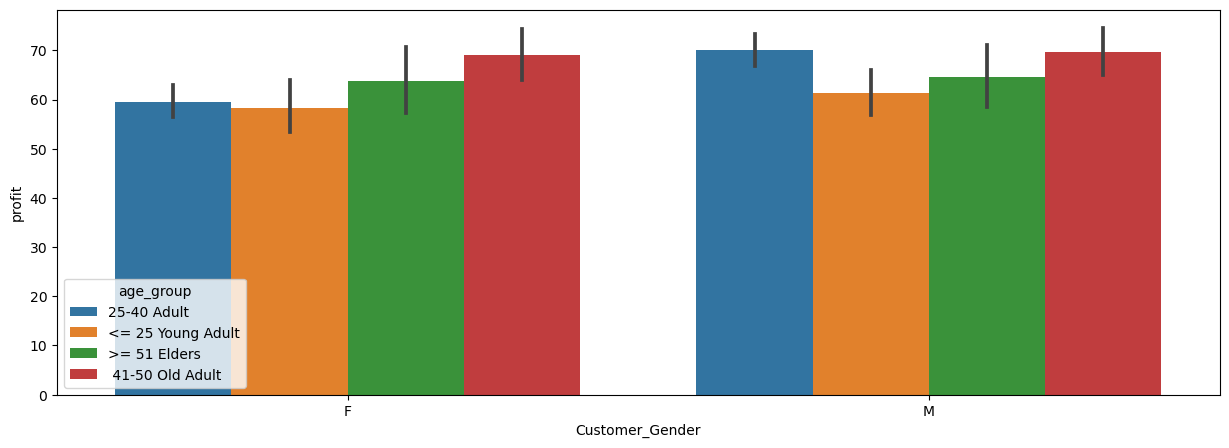

In [42]:
# Customer Gender and Age Group
plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y='profit', data=df, hue="age_group");

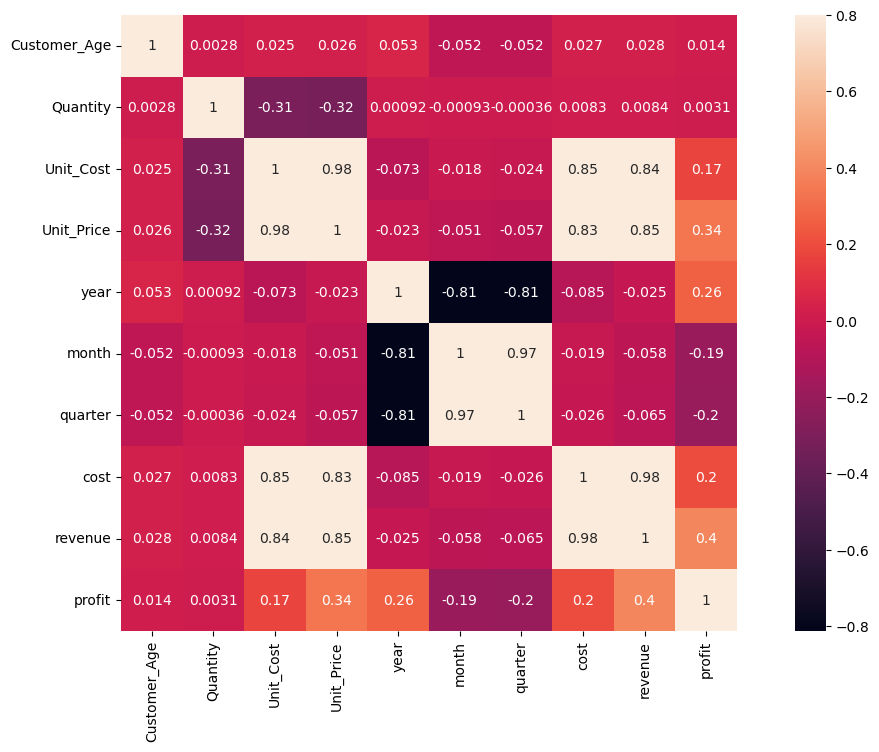

In [43]:
# Correlation
a = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);

In [ ]:
sns.pairplot(df, size=2.5);

In [ ]:
import warnings
warnings.filterwarnings("ignore")